Created on Tuesday January 5 2021

**Group 5 - Classification**  
**Function visual extraction v0**

@authors : J.J.

The notebook contains a function to clean up the data and functions to make visual representations of the articles.

# Import 

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.neighbors import LocalOutlierFactor
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Import data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
v0: pd.DataFrame = pd.read_json(
    "/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/Res_Innovation_semi_supervised_Feature.json")
v1: pd.DataFrame = pd.read_json(
    "/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/Res_Innovation_semi_supervised_bow.json")

data0: pd.DataFrame = pd.read_csv(
    "/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/Data_With_Features_Syntax.csv")
data1: pd.DataFrame = pd.read_json(
    "/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/df_final_clean.json")

df0 = pd.merge(left = data0, right = v0, on = 'art_id')
df1 = pd.merge(left = data1, right = v1, on = 'art_id')

df_innovant_v0 = df0[df0['innovation_features'] == 1].reset_index()
df_innovant_v1 = df1[df1['innovation_detection_bow'] == 1].reset_index()
df_non_innovant_v0 = df0[df0['innovation_features'] == 0].reset_index()
df_non_innovant_v1 = df1[df1['innovation_detection_bow'] == 0].reset_index()

In [13]:
gestion: pd.DataFrame = pd.read_json( "/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/Res_gestion_semi_supervised_V1_boost.json")
bow: pd.DataFrame = pd.read_json( "/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/Res_Innovation_semi_supervised_bow_V1.json") 
word2vec: pd.DataFrame = pd.read_json( "/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/Res_Innovation_semi_supervised_word2vec_V1.json")

df2 = pd.merge(left = data0, right = gestion, on = 'art_id')
df3 = pd.merge(left = data0, right = bow, on = 'art_id') 
df4 = pd.merge(left = data0, right = word2vec, on = 'art_id')

df_innovant_gestion = df2[df2['gamme_gestion'] == 1]
df_innovant_gestion = df_innovant_gestion.reset_index() 

df_innovant_bow = df3[df3['innovation_detection_bow'] == 1]
df_innovant_bow = df_innovant_bow.reset_index() 

df_innovant_word2vec = df4[df4['innovation_detection_bow'] == 1]
df_innovant_word2vec = df_innovant_word2vec.reset_index()

df_non_innovant_gestion = df2[df2['gamme_gestion'] == 0]
df_non_innovant_gestion = df_non_innovant_gestion.reset_index()

df_non_innovant_bow = df3[df3['innovation_detection_bow'] == 0]
df_non_innovant_bow = df_non_innovant_bow.reset_index() 

df_non_innovant_word2vec = df4[df4['innovation_detection_bow'] == 0]
df_non_innovant_word2vec = df_non_innovant_word2vec.reset_index()


In [ ]:
plus_gestion : pd.DataFrame = pd.read_json(
    "/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/fonction_gestion.json")
plus_innovation : pd.DataFrame = pd.read_json(
    "/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/fonction_innovation.json")
moins_gestion : pd.DataFrame = pd.read_json(
    "/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/fonction_non_gestion.json")
moins_innovation : pd.DataFrame = pd.read_json(
    "/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Output/Innovation/fonction_non_innovation.json")

df5 = pd.merge(left = data0, right = plus_gestion, on = 'art_id')
df6 = pd.merge(left = data0, right = plus_innovation, on = 'art_id')
df7 = pd.merge(left = data0, right = moins_gestion, on = 'art_id')
df8 = pd.merge(left = data0, right = moins_innovation, on = 'art_id')

df_innovant_plus_gestion = df5[df5['gestion_detection'] == 1].reset_index()
df_innovant_plus_innovation = df6[df6['innovation_detection'] == 1].reset_index()

df_non_innovant_moins_gestion = df7[df7['gestion_detection'] == 0].reset_index()
df_non_innovant_moins_innovation = df8[df8['innovation_detection'] == 0].reset_index()

# Functions

### Data preprocessing

The "preprocessing" function removes empty words, punctuation, puts all articles in lowercase, ... It cleans up the articles. 

In [7]:
def preprocessing(sentence: str) -> str:
    """Documentation
    Parameters:
        data: 1 column of a dataframe especially choose because we want a column who contain only text

    Out (if exists):
        liste_return: liste of all the text of the dataframe return with preprocessing applied
    """
    stop_words: set = set(stopwords.words('french'))
    pattern: list = ['(', ')', ':', ';', ',', '&', '/',
               '"', "'", '\n', '©', 'n°', '-', 'ludivine', 'bailly','christine','verdier', 'jstories', 'dernier', 'article', 
               'jvstories', 'fabien', 'geledan', 'dgs', 'semaine', 'avril', 'deuxieme', 'septembre',
               'quels', 'pret', 'caroline', 'madame','mesdames','messieurs', 'monsieur','chere', 'martin', 'etaient',
               'comme', 'grisot', 'lancashire', 'faire','plus', 'sans', 'octobre','frédérique','jean','mathieu',
               'quand', 'rue', 'sylvain', 'decembre', 'blamer', 'situee', 'place',
               'malgré', 'levée', 'étaie', 'mène', 'poursuivis', 'malgre', 'mesures', 'ère', 'malgré',
               'journée', 'janvier', 'thématique', 'fncdg', 'autres', 'mot','art_content','jouclas',
               'tout', 'égal', 'quelle','dtype','object', 'length','name',' ob',' publiqu ','ibune',
               'créé', 'taille', 'face','après', 'dessous', 'deuxième',' nt','dé ','co ',
               'dix', 'utilisez', 'chamboule', 'postale', 'jv', 'aujourd','mar ', 
               'peut', 'cette', 'vols', 'finies',' con ',' ru','ifs',' tr','mai',
               'place', 'perdues', 'trois', 'lors','pres ','fpe',' bra',' th','date','heure',
               'art_content_clean_without_lem', 'ans', 'épidémie', 'style','dark',
               'masque', 'permis', 'toujours', 'télévision']
    if not isinstance(sentence, str):
        sentence: str = str(sentence)

    sentence: str = re.sub(r'\d', ' ', sentence)

    sentence: str = sentence.lower()

    for d in pattern:
        sentence: str = sentence.replace(d, " ")

    token_words: list = word_tokenize(sentence)
    filtre: type = [w for w in token_words if not w in stop_words]

    final_list: str = ""
    for word in filtre:
        final_list: str = final_list + word + " "
    return(final_list)

### Visual representation

The following functions allow you to make visual representations such as word clouds and dimension reduction in 2D and 3D.

In [8]:
# Generates a word cloud for an article
def wordcloud_art(text: str):
    """Documentation
    Parameters:
        text: the article that will be show on the word cloud
    """
    text: str = preprocessing(text)
    if len(text) > 0:
        wordcloud: str = WordCloud(relative_scaling=1.0,).generate(str(text))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
        plt.close()
    else:
        print("The article have a size of 0.")

In [9]:
# Generates a word cloud from a list of articles
def wordcloud_list_art(text: list):
    """Documentation
    Parameters:
        text: the list of articles that will be show on the word cloud
    """
    list_articles: str = ""
    for i in range(len(text)):
        list_articles: str = list_articles + text[0]
    wordcloud_art(text)

# Word Clouds

### Word clouds v0 / v1

The words of data frame v0 speak more about innovation than those of v1.

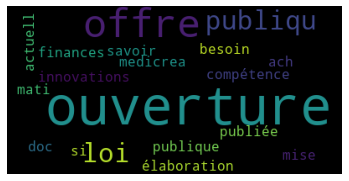

In [ ]:
wordcloud_list_art(df_innovant_v0.loc[:len(df_innovant_v0), "art_content"])

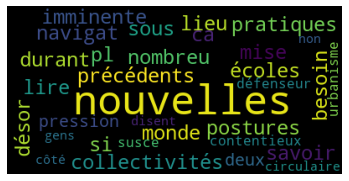

In [ ]:
wordcloud_list_art(df_innovant_v1.loc[:len(df_innovant_v1), "art_content"])

The words of non-innovative data frames do not speak at all of innovation.

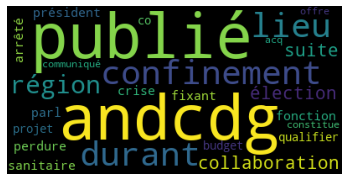

In [ ]:
wordcloud_list_art(df_non_innovant_v0.loc[:len(df_non_innovant_v0), "art_content"])

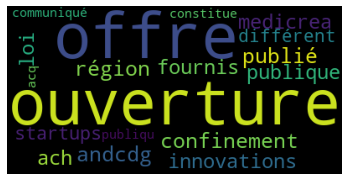

In [ ]:
wordcloud_list_art(df_non_innovant_v1.loc[:len(df_non_innovant_v1), "art_content"])

The data frame v0 is therefore the most relevant.

### Word clouds Gestion / Bow / Word2vec

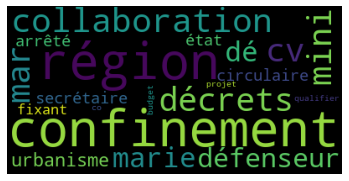

In [10]:
wordcloud_list_art(df_innovant_gestion.loc[:len(df_innovant_gestion), "art_content"])

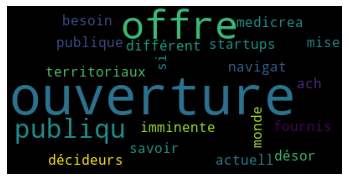

In [14]:
wordcloud_list_art(df_innovant_bow.loc[:len(df_innovant_bow), "art_content"])

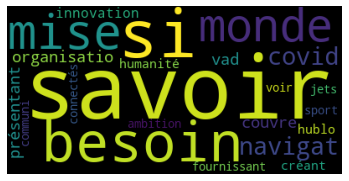

In [ ]:
wordcloud_list_art(df_innovant_word2vec.loc[:1200, "art_content"])

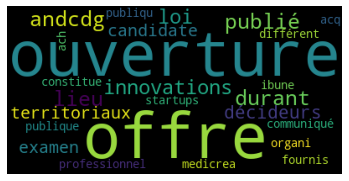

In [ ]:
wordcloud_list_art(df_non_innovant_gestion.loc[:len(df_non_innovant_gestion), "art_content"])

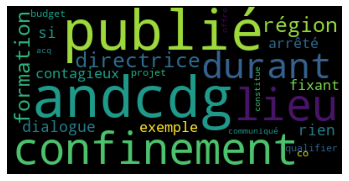

In [15]:
wordcloud_list_art(df_non_innovant_bow.loc[:len(df_non_innovant_bow), "art_content"])

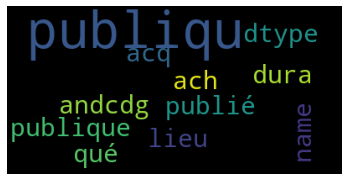

In [ ]:
wordcloud_list_art(df_non_innovant_word2vec.loc[:len(df_non_innovant_word2vec), "art_content"])

### Word clouds of documents that talk more/less about innovation and management


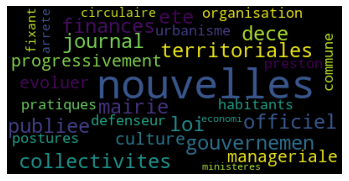

In [ ]:
wordcloud_list_art(df_innovant_plus_gestion.loc[:len(df_innovant_plus_gestion), "art_content_clean_without_lem"])

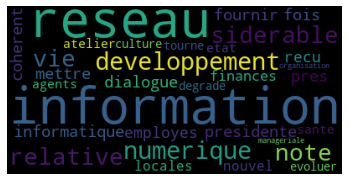

In [ ]:
wordcloud_list_art(df_innovant_plus_innovation.loc[:len(df_innovant_plus_innovation), "art_content_clean_without_lem"])

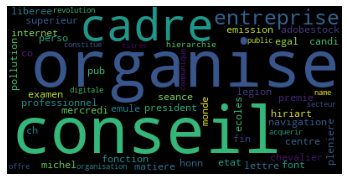

In [ ]:
wordcloud_list_art(df_non_innovant_moins_gestion.loc[:len(df_non_innovant_moins_gestion), "art_content_clean_without_lem"])

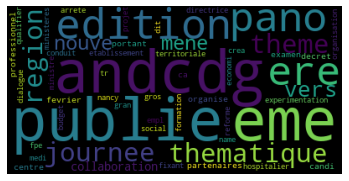

In [ ]:
wordcloud_list_art(df_non_innovant_moins_innovation.loc[:len(df_non_innovant_moins_innovation), "art_content_clean_without_lem"])